## Construindo e visualizando frequências de palavras

Vamos nos concentrar na função auxiliar build_freqs() e na visualização de um conjunto de dados inserido nela. Em nosso objetivo de análise de sentimento de tweet, esta função construirá um dicionário onde poderemos consultar quantas vezes uma palavra aparece nas listas de tweets positivos ou negativos.

In [ ]:
# imports
import nltk                                  
from nltk.corpus import twitter_samples      
import matplotlib.pyplot as plt              
import numpy as np                           

from utils import process_tweet, build_freqs

nltk.download('stopwords')
nltk.download('twitter_samples')

In [3]:
# obtem a lista de tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatena as listas
tweets = all_positive_tweets + all_negative_tweets

# cria um array representando os rótulos dos tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

# cria um dicionário de frequencias
freqs = build_freqs(tweets, labels)

# verifica o tamanho total do dicionário
print(f'len(freqs) = {len(freqs)}')

len(freqs) = 13171


### Tabela de Contagem de Palavras

In [14]:
# seleciona um conjunto de palavras específicas, para visualização
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
  '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
  'song', 'idea', 'power', 'play', 'magnific', "gay", "mohammed"]

# lista representando a tabela de palavras
data = []

# percorre a lista de palavras
for word in keys:
    
    pos = 0
    neg = 0
    
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    data.append([word, pos, neg])
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0],
 ['gay', 4, 6],
 ['mohammed', 0, 0]]

/Users/edneyosf/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


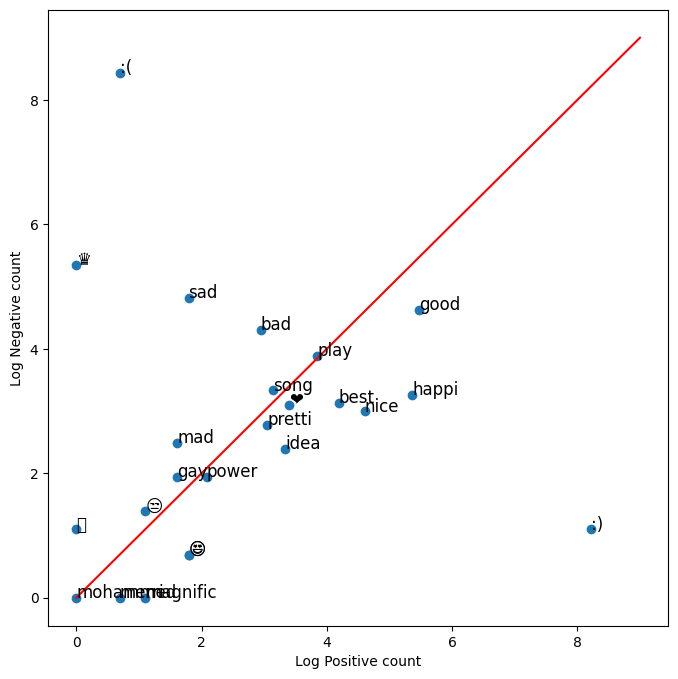

In [15]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()